# Project Name : Calories Burnt Prediction Using Machine Learning

# Developed By : Varshini K S

# Objective : To develop machine learning model that predicts the number of calories burned during Physical activities.The model will utilize user-specific information and activity-related features to provide accurate calorie predictions.

# Real world Datasets : calories.csv , exercise.csv

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
from xgboost import XGBRegressor

In [4]:
def read_csv(file_path):
    """
    Read data from CSV file and return a pandas DataFrame.
    
    Parameters:
    - file_path: str, the path to the CSV file.
    
    Returns:
    - pd.DataFrame, the loaded DataFrame.
    """
    return pd.read_csv(file_path)

def dataset_info_statistics(dta):
    """
    Display information and basic statistics about the dataset
    
    Parameters:
    - data : pandas dataframe, input data
    
    Returns:
    - None
    """
    
    #Display general information about the dataset
    print("Dataset Information")
    print(data.info())
    print("\n")
    
    #Display basic statistics for numerical columns
    print("Basic statistics for numerical columns:")
    print(data.describe())
    print("\n")

#check for the null values in the dataset
def check_null(data):
    """
    Check for null values in the dataset
    
    Parameters : Pandas DataFrame,input data.
    
    Returns:
    - pd.series,the count of null values for each column.
    """
    null_counts = data.isnull().sum()
    
    print("Null values in the Dataset:")
    return null_counts

#ckeck for duplicated rows in the dataset
def check_duplicate(data):
    """
    Check for duplicated rows in the dataset
    
    Parameters : Pandas DataFrame,input data.
    
    Returns:
    - bool,True if any duplicated rows exist, False otherwise.
    """
    
    return data.duplicated().any()

#Getting basic analysis for numerical and categorical columns
def plot_graph(data):
    """
    Plot graphs for numerical and categorical data in a dataframe.
    
    Parameters: Pandas DataFrame , input data
    Returns:
    -None
    """
    num_columns = data.select_dtypes(include=np.number).columns
    for column in num_columns:
        plt.figure(figsize=(5,3))
        sns.displot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    cat_columns = data.select_dtypes(include='object').columns
    for column in cat_columns:
        plt.figure(figsize=(5,3))
        sns.countplot(data[column])
        plt.title(f"Countplot for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()
        
def sep_features_target(data,target_column):
    """
    Separate features and target variable
    
    Parameters:
    -data: pandas DataFrame, input data.
    -target_column: str, the column representing the target variable
    
    Returns:
    -X : pandas dataFrame, features.
    -y : pandas Series , target variable
    """
    
    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]
    
    return X,y

def perform_train_test_split(X,y,test_size=0.20,random_state=42):
    """
    Perform train test split
    
    Parameters:
    -X : pandas DataFrame,features.
    -y : pandas Series,target variable.
    -test_size : float,optional,the proporation of the dataset to include in the test split
    (default is 0.20)
    -random_state : int, optional, seed for random number generation(default is 42)
    
    Returns:
    - X_train : panads DataFrame,features for training.
    - X_test : panads DataFrame,features for training.
    - y_train : pandas series,target variable for training.
    - y_test : pandas series,target variable for training.
    
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=random_state)
    
    return X_train,X_test,y_train,y_test

In [5]:
c = pd.read_csv('calories.csv')
e = pd.read_csv('exercise.csv')

In [6]:
c.head(1)

,User_ID,Calories
0,14733363,231.0


In [7]:
e.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8


In [8]:
data = pd.merge(c,e,on ='User_ID')

In [9]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
dataset_info_statistics(data)

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB
None


Basic statistics for numerical columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.035657

In [11]:
check_null(data)

Null values in the Dataset:


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [12]:
check_duplicate(data)

False

<Figure size 500x300 with 0 Axes>

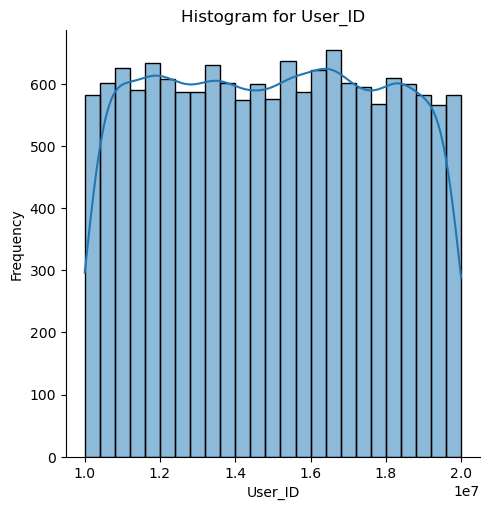

<Figure size 500x300 with 0 Axes>

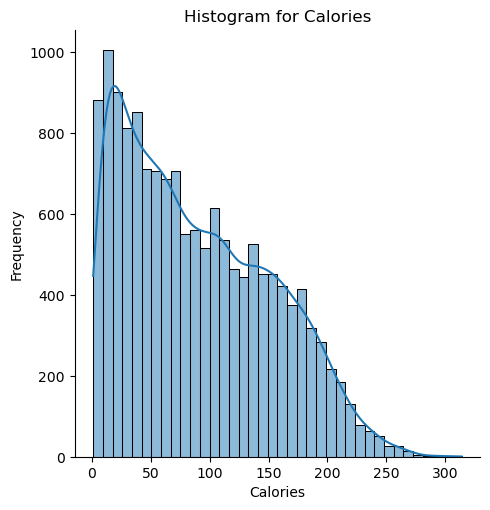

<Figure size 500x300 with 0 Axes>

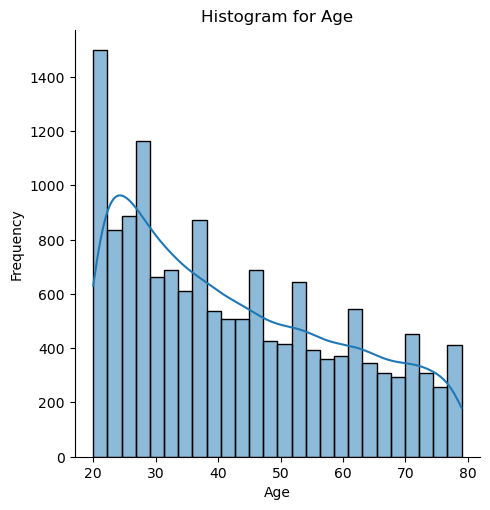

<Figure size 500x300 with 0 Axes>

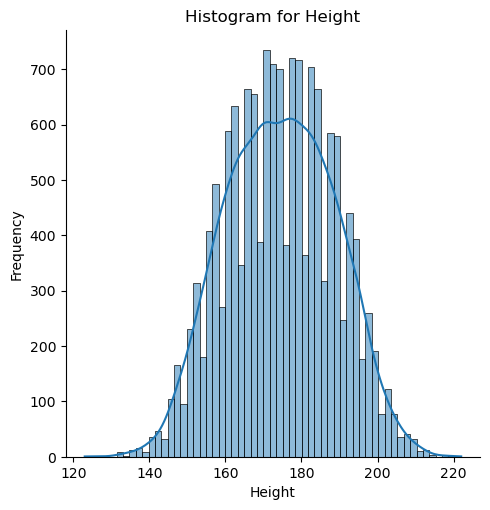

<Figure size 500x300 with 0 Axes>

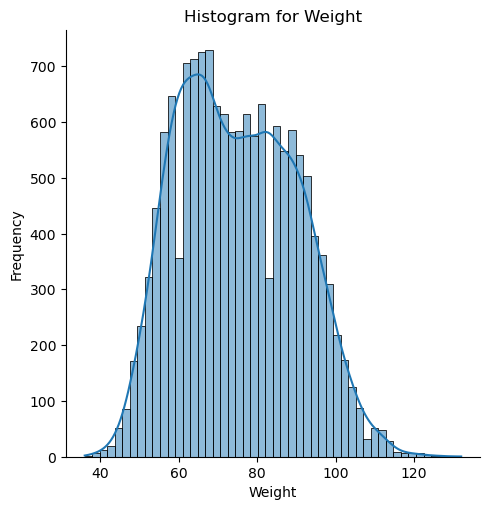

<Figure size 500x300 with 0 Axes>

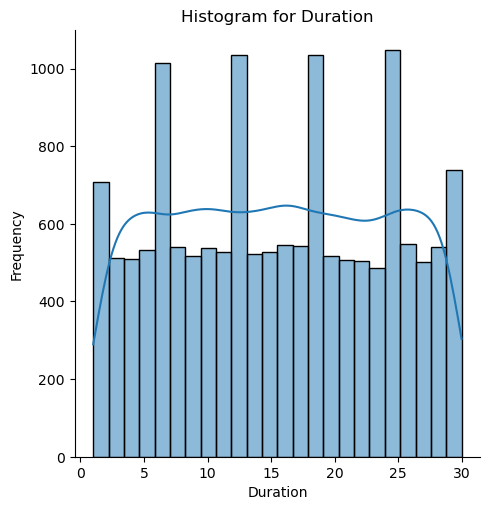

<Figure size 500x300 with 0 Axes>

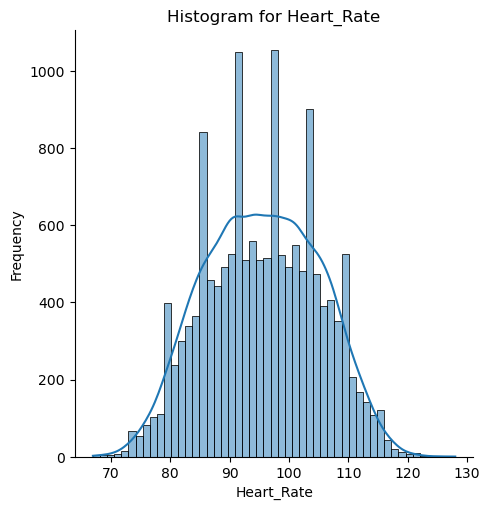

<Figure size 500x300 with 0 Axes>

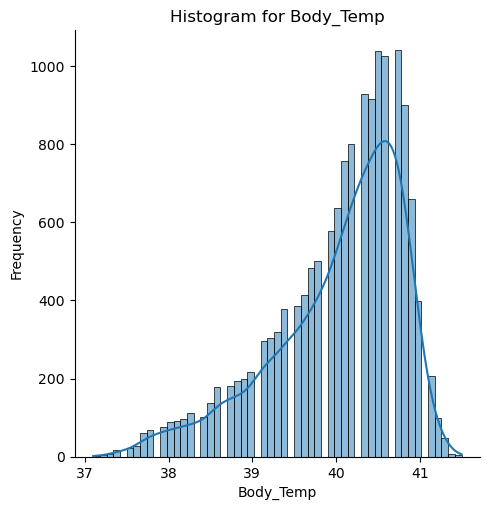

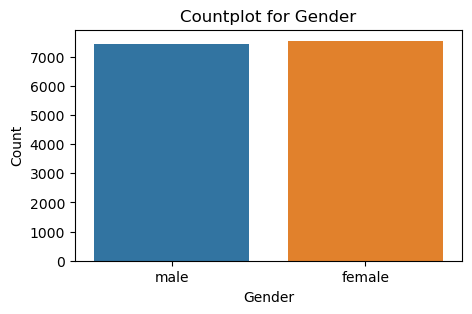

In [13]:
plot_graph(data)

In [14]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [15]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [16]:
X,y = sep_features_target(data,'Calories')

In [17]:
X.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [18]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [19]:
X=X.drop(columns=['User_ID'])

In [20]:
X_train,X_test,y_train,y_test=perform_train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,male,37,179.0,77.0,7.0,81.0,39.5
9680,male,23,195.0,87.0,26.0,110.0,40.5
7093,male,33,181.0,77.0,12.0,88.0,40.1
11293,female,66,156.0,54.0,9.0,77.0,39.5
820,female,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,female,75,148.0,51.0,22.0,104.0,40.6
13418,female,21,172.0,67.0,20.0,104.0,40.7
5390,male,57,189.0,92.0,8.0,90.0,39.5
860,male,35,174.0,76.0,12.0,97.0,40.2


In [22]:
X.shape

(15000, 7)

In [23]:
X_train.shape

(12000, 7)

In [24]:
X_test.shape

(3000, 7)

# Column Transformer and pipeline

In [25]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [26]:
preprocessor = ColumnTransformer(transformers=[
    ('Cat',OrdinalEncoder(),['Gender']),
   
    ('num',StandardScaler(),['Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp']),
],remainder='passthrough')

In [27]:
pipeline = Pipeline([('preprocessor',preprocessor),
         ("model",LinearRegression())])

In [28]:
from sklearn import set_config

In [29]:
set_config(display = 'diagram')

In [30]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [32]:
y_pred = pipeline.predict(X_test)

In [33]:
r2_score(y_test,y_pred)

0.9672937151257295

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(y_test,y_pred)

8.441513553849704

In [36]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

In [37]:
cv_results = cross_val_score(pipeline,X,y,cv = kfold,scoring='r2')

In [38]:
cv_results.mean()

0.9671402283675841

In [39]:
def model_scorer(model_name,model):
    """
    Evaluate the performance of a machine learning model using R2 score, Mean Absolute Error,and cross validation.
    
    Parameters:
    -model_name:str,name for the model.
    -model : machine learning model,the model to be evaluated.
    
    Returns:
    -output: list,containing model name,R2 score,Mean Absolute Error and cross-validation R2 score.
    
    """
    output=[]
    output.append(model_name)
    
    pipeline = Pipeline([('preprocessor',preprocessor),
                       ("model",model)])
    
    X_train,X_test,y_train,y_test=perform_train_test_split(X,y,test_size=0.20,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold = KFold(n_splits=5,shuffle=True,random_state=42)
    cv_results = cross_val_score(pipeline,X,y,cv = kfold,scoring='r2')
    output.append(cv_results.mean())
    
    return output
    

In [40]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR': XGBRegressor(),
}

In [41]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [42]:
model_output

[['log', 0.9672937151257295, 8.441513553849704, 0.9671402283675841],
 ['RF', 0.9982581109869486, 1.6879099999999998, 0.9979023976392611],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [43]:
pipeline = Pipeline([('preprocessor',preprocessor),
         ("model",XGBRegressor())])

In [44]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, dev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [45]:
sample = pd.DataFrame({
    'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [46]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

# Save the Model

In [47]:
import pickle

In [48]:
with open('pipeline.pkl','wb')as f:
    pickle.dump(pipeline,f)

In [49]:
with open('pipeline.pkl','rb')as f:
    pipeline_saved=pickle.load(f)

In [58]:
pipeline_saved.predict(sample)

array([231.0721], dtype=float32)

# Deployment

In [68]:
import pickle
import pandas as pd
from tkinter import *

def show_entry():
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)
        
    p1 = str(clicked.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    
    sample = pd.DataFrame({
    'Gender':[p1],
    'Age':[p2],
    'Height':[p3],
    'Weight':[p4],
    'Duration':[p5],
    'Heart_Rate':[p6],
    'Body_Temp':[p7],
},index=[0])
    
    result = pipeline.predict(sample)
    print(result)
    Label(master, text="Amount of Caloies Burnt").grid(row=13)
    Label(master, text=result[0]).grid(row=14)
    
master = Tk()
master.title("Calories Burnt Prediction using Machine Learning")
label = Label(master,text="calories burnt Prediction",bg = "black", fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Select Gender").grid(row=1)
Label(master,text = "Enter Your Age").grid(row=2)
Label(master,text = "Enter Your Height").grid(row=3)
Label(master,text = "Enter Your Weight").grid(row=4)
Label(master,text = "Duration").grid(row=5)
Label(master,text = "Heart Rate").grid(row=6)
Label(master,text = "Body Temp").grid(row=7)

clicked = StringVar()
options = ['male', 'female']

e1 = OptionMenu(master , clicked , *options)
e1.configure(width=15)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()
    

[151.04434]
